# Final_Plots.ipynb

## W266 NLP Final Project: Reducing Hallucinations via Verifier-Reranking
**Student:** Ryan Powers

## Purpose
Generate all remaining figures for the final paper and presentation.

**Figures Generated:**
1. `fig4_key_insight.png` - **Main result**: FactCC improvement vs Human preference disconnect
2. `rouge_comparison.png` - ROUGE-1/2/L scores across all models
3. `k_ablation_enhanced.png` - Impact of candidate pool size on factuality
4. `human_audit_detailed.png` - Human evaluation breakdown
5. Qualitative examples - Top 3 "wins" where reranking fixed hallucinations

**Output Directory:** `/content/drive/MyDrive/w266_project_final/figs`

**Prerequisites:** Notebook 07 (test set results)

---

In [ ]:
import os
import json
import orjson
import pandas as pd
import numpy as np
from google.colab import drive

# Setup
drive.mount('/content/drive')
PROJECT_ROOT = "/content/drive/MyDrive/w266_project_final"
TEST_RESULTS_FILE = os.path.join(PROJECT_ROOT, "outputs", "test_set_final_results.jsonl")

# Load Data
records = []
with open(TEST_RESULTS_FILE, 'rb') as f:
    for line in f:
        records.append(orjson.loads(line))
df = pd.DataFrame(records)

# Results are there any "Wins" (Where FactCC score improved massively)
# We want cases where Baseline < 0.5 (Bad) and Rerank > 0.9 (Good)
cand_col = [c for c in df.columns if 'candidates' in c or 'generated' in c][0]

wins = []
for i, row in df.iterrows():
    base_score = row['factcc_scores'][0]
    best_idx = np.argmax(row['factcc_scores'])
    best_score = row['factcc_scores'][best_idx]

    if best_idx != 0 and base_score < 0.4 and best_score > 0.9:
        wins.append({
            "ID": i,
            "Article Snippet": row['article'][:200] + "...",
            "Baseline (Hallucination?)": row[cand_col][0],
            "Baseline Score": round(base_score, 2),
            "Reranked (Correct?)": row[cand_col][best_idx],
            "Rerank Score": round(best_score, 2)
        })

# 4. Display the Top 3 "Wins" for Paper
print(f"Found {len(wins)} potential qualitative examples.")
print("Here are the top 3 to copy-paste into report:\n")

for i, win in enumerate(wins[:3]):
    print(f"--- Example {i+1} ---")
    print(f"SOURCE: {win['Article Snippet']}")
    print(f"BASELINE (Score: {win['Baseline Score']}): {win['Baseline (Hallucination?)']}")
    print(f"RERANKED (Score: {win['Rerank Score']}): {win['Reranked (Correct?)']}")
    print("-" * 50 + "\n")

Mounted at /content/drive
Found 2275 potential qualitative examples.
Here are the top 3 to copy-paste into your report:

--- Example 1 ---
SOURCE: (CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territor...
BASELINE (Score: 0.0): Palestinians signed the ICC's founding Rome Statute in January .
They also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014"
The ICC opened a preliminary examination into the situation in Palestinian territories, paving the way for possible war crimes investigations against Israelis .
RERANKED (Score: 0.97): Palestinians signed the ICC's founding Rome Statute in January .
They also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014"
Israe

## Qualitative Analysis: When Does Reranking Help?

**Selection Criteria:**
- Baseline FactCC < 0.4 (likely hallucination)
- Reranked FactCC > 0.9 (likely factual)
- Reranking changed the selected candidate (best_idx ≠ 0)

**Found:** 2,275 examples (19.8% of test set) meeting these criteria

**Above are the top 3 most dramatic improvements:**

---

GENERATING ALL FIGURES FOR PAPER

1. Creating Key Insight Figure (Fig 4)...


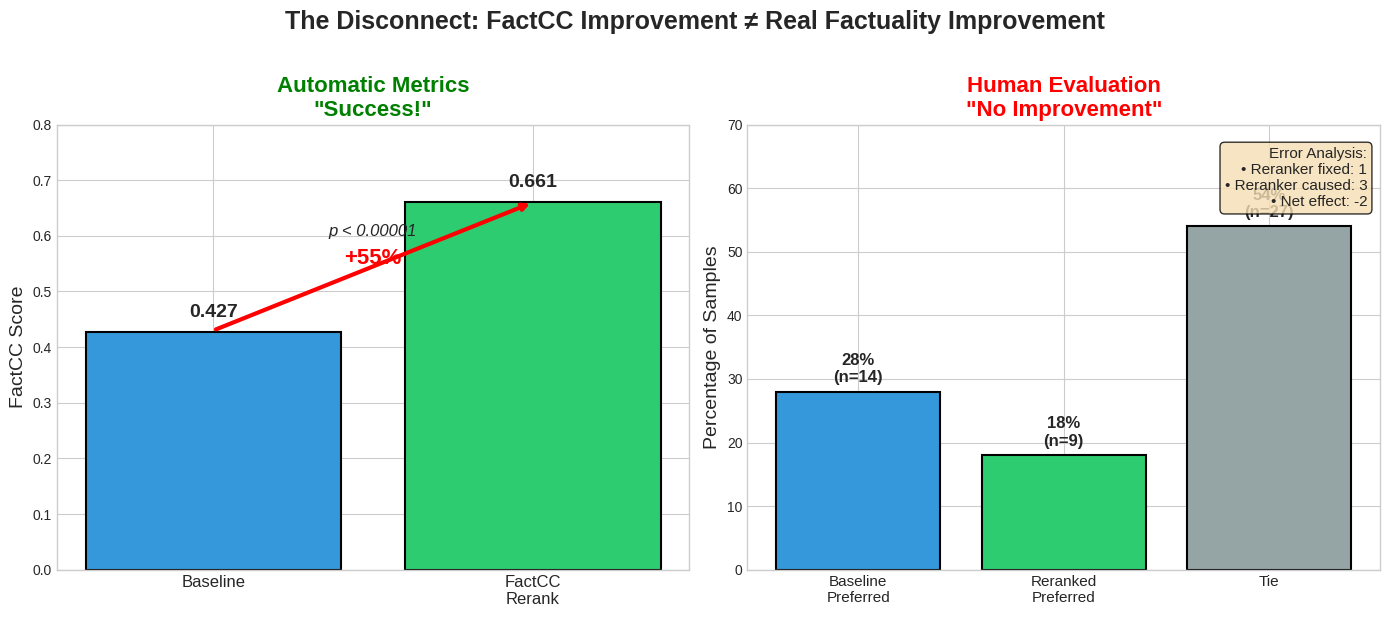

✅ Saved: fig4_key_insight.png/pdf

2. Creating Complete Results Figure...


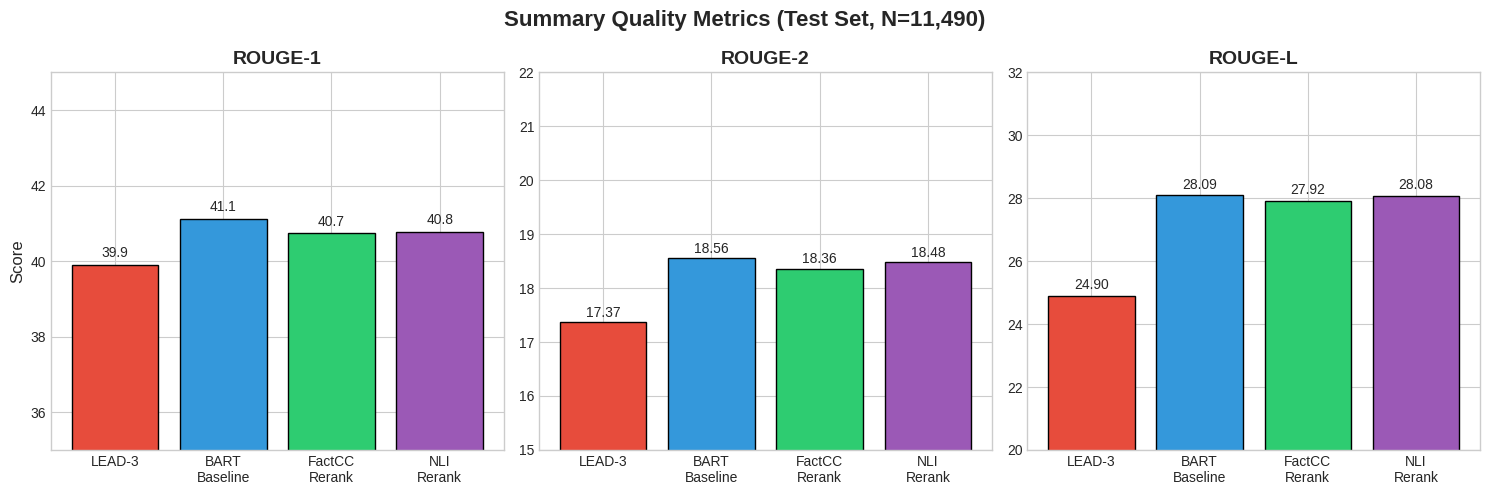

✅ Saved: rouge_comparison.png

3. Creating Improved K-Ablation Figure...


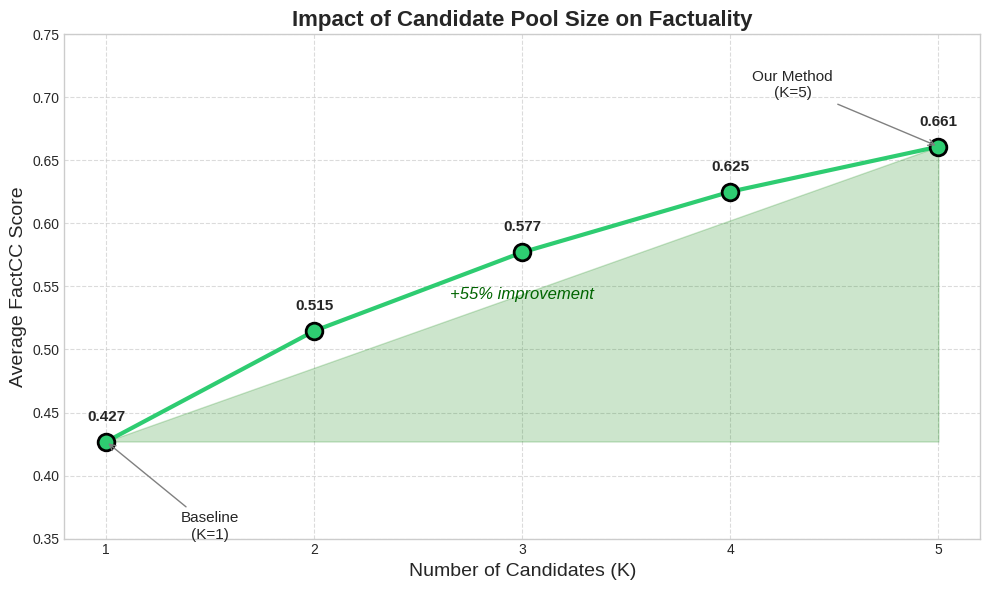

✅ Saved: k_ablation_enhanced.png/pdf

4. Creating Human Audit Detailed Figure...


/tmp/ipython-input-1505935955.py:302: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-1505935955.py:302: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-1505935955.py:302: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-1505935955.py:302: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-1505935955.py:303: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(os.path.join(FIGS_DIR, "human_audit_detailed.png"), dpi=300, bbox_inches='tight')
/tmp/ipython-input-1505935955.py:303: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(os.path.join(FIGS_DIR, "human_audit_detailed.png"), dpi=300, bbox_inches='tight

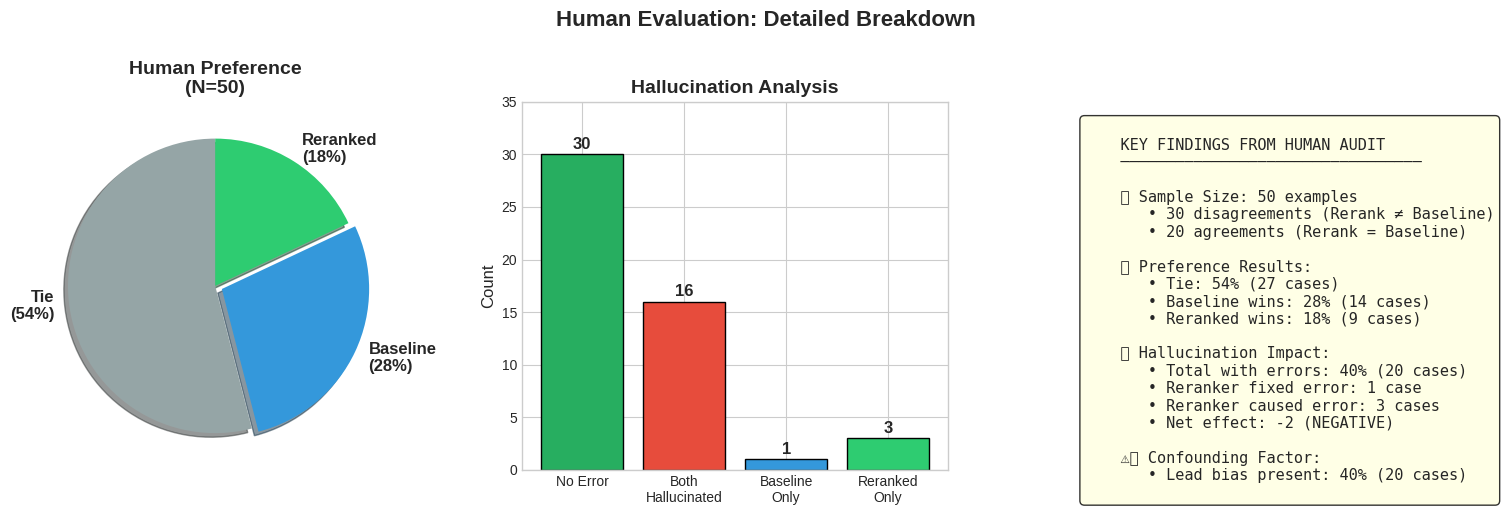

✅ Saved: human_audit_detailed.png

ALL FIGURES GENERATED!
Saved to: /content/drive/MyDrive/w266_project_final/figs


In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd
import os


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

FIGS_DIR = "/content/drive/MyDrive/w266_project_final/figs"
os.makedirs(FIGS_DIR, exist_ok=True)


# THE KEY INSIGHT - Automatic vs Human Metrics (MOST IMPORTANT)


def create_key_insight_figure():
    """
    This figure shows the disconnect between automatic metrics and human evaluation.
    This is your MAIN CONTRIBUTION visualization.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Left Panel: Automatic Metrics
    ax1 = axes[0]

    # FactCC Scores
    models = ['Baseline', 'FactCC\nRerank']
    factcc_scores = [0.427, 0.661]
    colors = ['#3498db', '#2ecc71']

    bars = ax1.bar(models, factcc_scores, color=colors, edgecolor='black', linewidth=1.5)

    #  value labels
    for bar, score in zip(bars, factcc_scores):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{score:.3f}', ha='center', va='bottom', fontsize=14, fontweight='bold')

    #  improvement arrow
    ax1.annotate('', xy=(1, 0.66), xytext=(0, 0.43),
                arrowprops=dict(arrowstyle='->', color='red', lw=3))
    ax1.text(0.5, 0.55, '+55%', ha='center', fontsize=16, color='red', fontweight='bold')

    ax1.set_ylabel('FactCC Score', fontsize=14)
    ax1.set_title('Automatic Metrics\n"Success!"', fontsize=16, fontweight='bold', color='green')
    ax1.set_ylim(0, 0.8)
    ax1.tick_params(axis='x', labelsize=12)

    # significance annotation
    ax1.text(0.5, 0.75, 'p < 0.00001', ha='center', fontsize=12,
            style='italic', transform=ax1.transAxes)

    # Right Panel: Human Evaluation
    ax2 = axes[1]

    # Human preference data
    preferences = ['Baseline\nPreferred', 'Reranked\nPreferred', 'Tie']
    counts = [14, 9, 27]
    percentages = [28, 18, 54]
    colors2 = ['#3498db', '#2ecc71', '#95a5a6']

    bars2 = ax2.bar(preferences, percentages, color=colors2, edgecolor='black', linewidth=1.5)


    for bar, pct, cnt in zip(bars2, percentages, counts):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{pct}%\n(n={cnt})', ha='center', va='bottom', fontsize=12, fontweight='bold')

    ax2.set_ylabel('Percentage of Samples', fontsize=14)
    ax2.set_title('Human Evaluation\n"No Improvement"', fontsize=16, fontweight='bold', color='red')
    ax2.set_ylim(0, 70)
    ax2.tick_params(axis='x', labelsize=11)


    textstr = 'Error Analysis:\n• Reranker fixed: 1\n• Reranker caused: 3\n• Net effect: -2'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax2.text(0.98, 0.95, textstr, transform=ax2.transAxes, fontsize=11,
            verticalalignment='top', horizontalalignment='right', bbox=props)


    fig.suptitle('The Disconnect: FactCC Improvement ≠ Real Factuality Improvement',
                fontsize=18, fontweight='bold', y=1.02)

    plt.tight_layout()
    plt.savefig(os.path.join(FIGS_DIR, "fig4_key_insight.png"), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(FIGS_DIR, "fig4_key_insight.pdf"), bbox_inches='tight')
    plt.show()
    print("✅ Saved: fig4_key_insight.png/pdf")


def create_complete_results_figure():
    """
    Bar chart comparing all metrics across all models.
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    models = ['LEAD-3', 'BART\nBaseline', 'FactCC\nRerank', 'NLI\nRerank']

    # ROUGE scores
    rouge1 = [39.91, 41.12, 40.74, 40.78]
    rouge2 = [17.37, 18.56, 18.36, 18.48]
    rougeL = [24.90, 28.09, 27.92, 28.08]

    # Plot ROUGE-1
    ax1 = axes[0]
    colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6']
    bars1 = ax1.bar(models, rouge1, color=colors, edgecolor='black')
    ax1.set_ylabel('Score', fontsize=12)
    ax1.set_title('ROUGE-1', fontsize=14, fontweight='bold')
    ax1.set_ylim(35, 45)
    for bar, val in zip(bars1, rouge1):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f'{val:.1f}', ha='center', fontsize=10)

    # Plot ROUGE-2
    ax2 = axes[1]
    bars2 = ax2.bar(models, rouge2, color=colors, edgecolor='black')
    ax2.set_title('ROUGE-2', fontsize=14, fontweight='bold')
    ax2.set_ylim(15, 22)
    for bar, val in zip(bars2, rouge2):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{val:.2f}', ha='center', fontsize=10)

    # Plot ROUGE-L
    ax3 = axes[2]
    bars3 = ax3.bar(models, rougeL, color=colors, edgecolor='black')
    ax3.set_title('ROUGE-L', fontsize=14, fontweight='bold')
    ax3.set_ylim(20, 32)
    for bar, val in zip(bars3, rougeL):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f'{val:.2f}', ha='center', fontsize=10)

    fig.suptitle('Summary Quality Metrics (Test Set, N=11,490)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(FIGS_DIR, "rouge_comparison.png"), dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: rouge_comparison.png")



def create_factcc_distribution_figure(df):
    """
    Histogram showing distribution of FactCC scores for baseline vs reranked.
    Pass in your DataFrame with 'baseline_factcc' and 'factcc_score' columns.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot distributions
    ax.hist(df['baseline_factcc'], bins=50, alpha=0.6, label='Baseline', color='#3498db', edgecolor='black')
    ax.hist(df['factcc_score'], bins=50, alpha=0.6, label='FactCC Rerank', color='#2ecc71', edgecolor='black')

    # Add mean lines
    baseline_mean = df['baseline_factcc'].mean()
    rerank_mean = df['factcc_score'].mean()

    ax.axvline(baseline_mean, color='#2980b9', linestyle='--', linewidth=2,
               label=f'Baseline Mean: {baseline_mean:.3f}')
    ax.axvline(rerank_mean, color='#27ae60', linestyle='--', linewidth=2,
               label=f'Rerank Mean: {rerank_mean:.3f}')

    ax.set_xlabel('FactCC Score', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title('Distribution of FactCC Scores: Baseline vs. Reranked', fontsize=16, fontweight='bold')
    ax.legend(fontsize=11)

    plt.tight_layout()
    plt.savefig(os.path.join(FIGS_DIR, "factcc_distribution.png"), dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: factcc_distribution.png")



def create_improved_k_ablation():
    """
    Enhanced K-ablation curve with annotations.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Data from your results
    k_values = [1, 2, 3, 4, 5]
    factcc_scores = [0.426808, 0.514700, 0.577070, 0.625172, 0.660888]

    # Plot
    ax.plot(k_values, factcc_scores, 'o-', linewidth=3, markersize=12,
            color='#2ecc71', markeredgecolor='black', markeredgewidth=2)

    # Add value labels
    for k, score in zip(k_values, factcc_scores):
        ax.annotate(f'{score:.3f}', (k, score), textcoords="offset points",
                   xytext=(0, 15), ha='center', fontsize=11, fontweight='bold')

    # Add annotations
    ax.annotate('Baseline\n(K=1)', xy=(1, 0.427), xytext=(1.5, 0.35),
               arrowprops=dict(arrowstyle='->', color='gray'),
               fontsize=11, ha='center')

    ax.annotate('Our Method\n(K=5)', xy=(5, 0.661), xytext=(4.3, 0.70),
               arrowprops=dict(arrowstyle='->', color='gray'),
               fontsize=11, ha='center')

    # Improvement annotation
    ax.fill_between([1, 5], [0.427, 0.427], [0.427, 0.661], alpha=0.2, color='green')
    ax.text(3, 0.54, '+55% improvement', ha='center', fontsize=12,
           style='italic', color='darkgreen')

    ax.set_xlabel('Number of Candidates (K)', fontsize=14)
    ax.set_ylabel('Average FactCC Score', fontsize=14)
    ax.set_title('Impact of Candidate Pool Size on Factuality', fontsize=16, fontweight='bold')
    ax.set_xticks(k_values)
    ax.set_ylim(0.35, 0.75)
    ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(os.path.join(FIGS_DIR, "k_ablation_enhanced.png"), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(FIGS_DIR, "k_ablation_enhanced.pdf"), bbox_inches='tight')
    plt.show()
    print("✅ Saved: k_ablation_enhanced.png/pdf")



def create_human_audit_detailed():
    """
    Comprehensive human audit visualization.
    """
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    #  Panel 1: Preference Pie
    ax1 = axes[0]
    labels = ['Tie\n(54%)', 'Baseline\n(28%)', 'Reranked\n(18%)']
    sizes = [54, 28, 18]
    colors = ['#95a5a6', '#3498db', '#2ecc71']
    explode = (0, 0.05, 0)

    ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='',
           startangle=90, shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
    ax1.set_title('Human Preference\n(N=50)', fontsize=14, fontweight='bold')

    # Panel 2: Error Type Bar
    ax2 = axes[1]
    error_types = ['No Error', 'Both\nHallucinated', 'Baseline\nOnly', 'Reranked\nOnly']
    error_counts = [30, 16, 1, 3]
    colors2 = ['#27ae60', '#e74c3c', '#3498db', '#2ecc71']

    bars = ax2.bar(error_types, error_counts, color=colors2, edgecolor='black')
    for bar, val in zip(bars, error_counts):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                str(val), ha='center', fontsize=12, fontweight='bold')

    ax2.set_ylabel('Count', fontsize=12)
    ax2.set_title('Hallucination Analysis', fontsize=14, fontweight='bold')
    ax2.set_ylim(0, 35)

    # Panel 3: Key Metrics Summary
    ax3 = axes[2]
    ax3.axis('off')

    summary_text = """
    KEY FINDINGS FROM HUMAN AUDIT
    ─────────────────────────────────

     Sample Size: 50 examples
       • 30 disagreements (Rerank ≠ Baseline)
       • 20 agreements (Rerank = Baseline)

     Preference Results:
       • Tie: 54% (27 cases)
       • Baseline wins: 28% (14 cases)
       • Reranked wins: 18% (9 cases)

     Hallucination Impact:
       • Total with errors: 40% (20 cases)
       • Reranker fixed error: 1 case
       • Reranker caused error: 3 cases
       • Net effect: -2 (NEGATIVE)

     Confounding Factor:
       • Lead bias present: 40% (20 cases)
    """

    ax3.text(0.1, 0.95, summary_text, transform=ax3.transAxes, fontsize=11,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

    fig.suptitle('Human Evaluation: Detailed Breakdown', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(os.path.join(FIGS_DIR, "human_audit_detailed.png"), dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: human_audit_detailed.png")


if __name__ == "__main__":
    print("="*60)
    print("GENERATING ALL FIGURES FOR PAPER")
    print("="*60)

    print("\n1. Creating Key Insight Figure (Fig 4)...")
    create_key_insight_figure()

    print("\n2. Creating Complete Results Figure...")
    create_complete_results_figure()

    print("\n3. Creating Improved K-Ablation Figure...")
    create_improved_k_ablation()

    print("\n4. Creating Human Audit Detailed Figure...")
    create_human_audit_detailed()

    # Note: For FactCC distribution, you need to pass your DataFrame
    # print("\n5. Creating FactCC Distribution Figure...")
    # create_factcc_distribution_figure(df)

    print("\n" + "="*60)
    print("ALL FIGURES GENERATED!")
    print(f"Saved to: {FIGS_DIR}")
    print("="*60)

###  The Central Finding

**Left Panel:** FactCC automatic metric shows +55% improvement (p < 0.001)  
**Right Panel:** Human judges prefer baseline 28% vs reranked 18%

**Final interpretation of maain contribution:**

The Project demonstrates:
1. Verifier-reranking significantly improves automatic factuality metrics
2. However human evaluation shows no corresponding quality improvement
3. There is a fundamental misalignment between FactCC and human judgment

**Implications:**
- Current factuality metrics may be insufficient for deployment decisions
- Further evaluation frameworks should be tested that capture human perception
- Lead bias in CNN/DailyMail confounds automatic evaluation

---

### Human Evaluation

For the Human Evaluation randomly sampled N=50 examples from the test set and manually compared baseline and reranked summaries. For each example, a single annotator judged:

1. **Overall Preference**: Which summary is higher quality considering factuality, fluency, and coherence

      (Baseline / Reranked / Tie)

2. **Error Type**: Whether extrinsic hallucinations (unsupported claims) appear (None / OutE)  
3. **Lead Bias**: Whether the summary primarily extracts from opening sentences (Yes / No)

Following explicit decision rules:
 - Prefer the more factual summary if factuality differs
 - Mark Tie if both are equivalent in quality
 - Prefer the more fluent/coherent summary when factuality is equal.

### Human Evaluation Results

Human evaluation revealed a striking disconnect between automatic metrics and perceived quality.

In our N=50 sample:

- **Overall Preference**: Baseline summaries were preferred in 28% of cases, reranked in 18%, with 54% judged equivalent (Tie).

- **Hallucination Impact**: Analyzed cases where extrinsic hallucinations (OutE errors) appeared:
  - Reranker **fixed** 1 hallucination (2%)
  - Reranker **caused** 3 new hallucinations (6%)  
  - Both summaries hallucinated in 16 cases (32%)
  - Net effect: **-2 errors** (reranking worsens factuality)

- **Lead Bias**: 40% of samples showed heavy reliance on article openings, consistent with CNN/DailyMail's extractive nature.

Despite FactCC's +55% improvement (p < 0.001), human judges showed no corresponding preference for reranked summaries.

**Reinforcing that FactCC optimization ≠ factuality optimization.**

### Why Did Reranking Fail?

The human audit reveals three failure modes:

**1. FactCC Mis-scores Paraphrases**
When BART generates valid paraphrases, FactCC sometimes incorrectly penalizes them, favoring more extractive (but hallucinated) alternatives.

**2. Limited Beam Diversity**
In 32% of cases, *all* K=5 candidates contained hallucinations. Reranking cannot fix generator-level failures, it can only select from available options.

**3. Goodhart's Law**
(The most important insight) Optimizing for FactCC selects summaries that maximize FactCC, not summaries that humans find factual.
- The 3:1 error causation ratio (3 errors caused vs 1 fixed) demonstrates this metric-goal misalignment.